### MNIST로 기초 데이터 분석
- 28 X 28 크기의 이미지 파일
- 손글씨나 필기채인 글씨로 이루어져 있다

#### 데이터 전처리
- 정규화
    * 최소값과 최대값을 기준으로 [0, 1]의 값으로 전부 변화
- 표준화
    * 평균과 표준편차를 이용해서 N~(0, 1)인 정규 분포로 정리하는 과정
    * 이상치는 제거한다
- 원핫 인코딩
    * 정답의 개수와 동일한 크기를 가지는 리스트를 생성
    * 정답에 해당하는 인덱스는 1, 나머지는 0을 넣어 정답 표시

In [2]:
# 데이터 불러오기

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist

In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('\n train shape = ', x_train.shape, ", train label shape = ", y_train.shape)
print('\n test shape = ', x_test.shape, ", test label shape = ", y_test.shape)

print('\n train label = ', y_train)
print('\n test label = ', y_test)



 train shape =  (60000, 28, 28) , train label shape =  (60000,)

 test shape =  (10000, 28, 28) , test label shape =  (10000,)

 train label =  [5 0 4 ... 5 6 8]

 test label =  [7 2 1 ... 4 5 6]


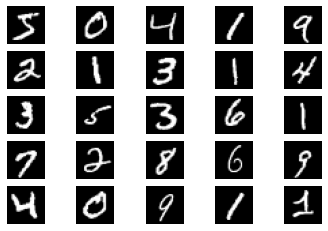

In [20]:
import matplotlib.pyplot as plt

# 25개 이미지 출력
for index in range(25):
    plt.subplot(5, 5, index + 1)
    plt.imshow(x_train[index], cmap = "gray")
    plt.axis('off')
    # plt.title(str(y_train[index]))
    
plt.show()

In [21]:
# 학습데이터 / 테스트 데이터 정규화

x_train = (x_train - 0.0) / (255.0 - 0.0)
x_test = (x_test - 0.0) / (255.0 - 0.0)

# 정답데이터 원핫 인코딩

y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10)


In [22]:
# 모델 구축
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))

model.add(tf.keras.layers.Dense(100, activation = 'relu'))

model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [23]:
# 모델 컴파일

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3), 
             loss = "categorical_crossentropy", 
             metrics = ["accuracy"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [24]:
# 모델 학습

hist = model.fit(x_train, y_train, epochs = 30, validation_split = 0.3)

Epoch 1/30
1313/1313 [==============================] - 1s 785us/step - loss: 0.3158 - accuracy: 0.9100 - val_loss: 0.1898 - val_accuracy: 0.9456
Epoch 2/30
1313/1313 [==============================] - 1s 703us/step - loss: 0.1462 - accuracy: 0.9573 - val_loss: 0.1351 - val_accuracy: 0.9603
Epoch 3/30
1313/1313 [==============================] - 1s 707us/step - loss: 0.1013 - accuracy: 0.9703 - val_loss: 0.1232 - val_accuracy: 0.9629
Epoch 4/30
1313/1313 [==============================] - 1s 713us/step - loss: 0.0761 - accuracy: 0.9773 - val_loss: 0.1092 - val_accuracy: 0.9684
Epoch 5/30
1313/1313 [==============================] - 1s 707us/step - loss: 0.0603 - accuracy: 0.9816 - val_loss: 0.1067 - val_accuracy: 0.9690
Epoch 6/30
1313/1313 [==============================] - 1s 712us/step - loss: 0.0475 - accuracy: 0.9863 - val_loss: 0.1064 - val_accuracy: 0.9703
Epoch 7/30
1313/1313 [==============================] - 1s 708us/step - loss: 0.0388 - accuracy: 0.9885 - val_loss: 0.1011 -

In [17]:
# 모데 평가

model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 430us/step - loss: 0.1511 - accuracy: 0.9716


[0.15106379985809326, 0.9715999960899353]

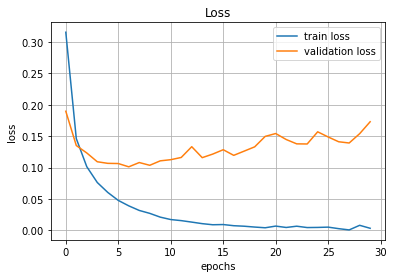

In [26]:
# 손실함수 그래프 그리기

plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history["loss"], label = "train loss")
plt.plot(hist.history['val_loss'], label = "validation loss")

plt.legend(loc = "best")

plt.show()


In [27]:
# 혼동행렬??

from sklearn.metrics import confusion_matrix
import seaborn as sns

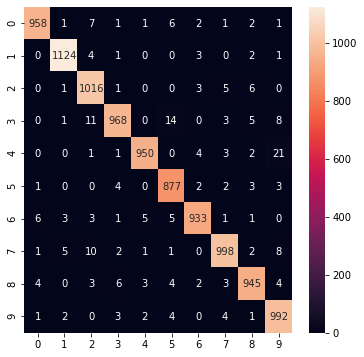

In [29]:

plt.figure(figsize = (6, 6))

predicted_value = model.predict(x_test)

cm = confusion_matrix(np.argmax(y_test, axis = -1), 
                     np.argmax(predicted_value, axis = 1))

sns.heatmap(cm, annot = True, fmt = "d")
plt.show()